# Topic Modelling


**Latent Dirichlet Allocation (LDA):**

- LDA is a generative probabilistic model. It assumes that each document is a mixture of topics and that each
topic is characterized by a distribution over words. It generates documents by sampling from these distributions.
- LDA is based on Bayesian inference, where it infers topic distributions for documents and word distributions for topics from the data.


**Modeling Approach**


- LDA explicitly models the generation of documents, where documents are represented as a mixture of topics and 
topics as a mixture of words. It requires specification of the number of topics beforehand.
It uses Dirichlet distributions to model the distributions of topics in documents and words in topics.

**Interpretability**

- LDA provides a more interpretable set of topics because it generates distinct distributions over words for
each topic, allowing for a clearer understanding of what each topic represents.
- The probabilistic nature of LDA means that the relationships between words and topics are more explicitly defined.


In [1]:
import os
import numpy as np
import pandas as pd
import json
import gdown
import traceback
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
from textblob import Word, TextBlob
import time
import lxml
from bs4 import BeautifulSoup
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.util import ngrams
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [3]:
Philadelphia_reviews = pd.read_csv('/Users/mac/Downloads/ADC-MECD/data/Philadelphia_reviews.csv')
Philadelphia_reviews.head()

review_id                 user_id             business_id  \
0  TdmWqB-77Lirm-XgA4JJ4A  3fTw9hmzlbMK2Q32Q-a4Hw  kxX2SOes4o-D3ZQBkiMRfA   
1  05VCJQ6DuYW8rw1gpBGG9w  c4rYJcGZ0gRl-C6SqbehQQ  kxX2SOes4o-D3ZQBkiMRfA   
2  Up0DIF2JNsIwSkBh2mSl0w  EMMKdK1cGrLSo08wgSYHJQ  kxX2SOes4o-D3ZQBkiMRfA   
3  e8loVKkBln321zORmRqoUw  fbV1aq9ASXggQyGTNN-hzg  kxX2SOes4o-D3ZQBkiMRfA   
4  3G6pKVA4cHtT4F6V_dl5Rw  TeLcAcuphfDfg-lgehu2qg  kxX2SOes4o-D3ZQBkiMRfA   

   stars  useful  funny  cool  \
0      4       3      0     2   
1      3       0      0     0   
2      5       4      3     4   
3      5       1      0     1   
4      5       0      0     0   

                                                text                 date  \
0  I am now a regular. Pretty much every Saturday...  2012-03-30 17:55:49   
1  So a friend and I went to this Pakistani "hole...  2012-08-22 00:52:20   
2  I loveeee indian food, but I haven't ventured ...  2012-06-06 01:54:32   
3  I've been to this place a few times and while ...  2012-05-01 13:12:32   
4  Like other reviewers, I was initially a bit pu...  2012-05-04 01:03:47   

  restaurant_name  ...                                         attributes  \
0           Zaika  ...  {'Caters': 'True', 'Ambience': "{'romantic': F...   
1           Zaika  ...  {'Caters': 'True', 'Ambience': "{'romantic': F...   
2           Zaika  ...  {'Caters': 'True', 'Ambience': "{'romantic': F...   
3           Zaika  ...  {'Caters': 'True', 'Ambience': "{'romantic': F...   
4           Zaika  ...  {'Caters': 'True', 'Ambience': "{'romantic': F...   

                              categories   latitude longitude is_open  year  \
0  Halal, Pakistani, Restaurants, Indian  40.079848 -75.02508       1  2012   
1  Halal, Pakistani, Restaurants, Indian  40.079848 -75.02508       1  2012   
2  Halal, Pakistani, Restaurants, Indian  40.079848 -75.02508       1  2012   
3  Halal, Pakistani, Restaurants, Indian  40.079848 -75.02508       1  2012   
4  Halal, Pakistani, Restaurants, Indian  40.079848 -75.02508       1  2012   

   sentiment  text_length_before_clean  \
0          1                       174   
1          1                      1205   
2          1                       982   
3          1                       559   
4          1                       403   

                                        cleaned_text  \
0  am now regular Pretty much every Saturday pick...   
1  So friend and went to this Pakistani hole in t...   
2  loveeee indian food but have not ventured to m...   
3  ve been to this place few times and while have...   
4  Like other reviewers was initially bit put off...   

                      cleaned_text_stopwords_removed  
0  regular pretty much every saturday pick two en...  
1  friend pakistani hole wall literally feels lik...  
2  loveeee indian food ventured many indian resta...  
3  place times sampled even half menu yet say sur...  
4  like reviewers initially bit put decor market ...  

[5 rows x 23 columns]

## Additional Preprocessing

### Stemming and Lemmantization

In [4]:
# Initialize the stemmer and lemmatizer
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [5]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # stem and lemmatize
    tokens = [porter.stem(lemmatizer.lemmatize(word)) for word in tokens if word.isalnum()]
    return ' '.join(tokens)


In [6]:
Philadelphia_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'restaurant_name', 'address', 'city', 'state',
       'attributes', 'categories', 'latitude', 'longitude', 'is_open', 'year',
       'sentiment', 'text_length_before_clean', 'cleaned_text',
       'cleaned_text_stopwords_removed'],
      dtype='object')

In [7]:
Philadelphia_reviews['final_text'] = Philadelphia_reviews['cleaned_text_stopwords_removed'].apply(preprocess_text)
Philadelphia_reviews[['text', 'cleaned_text','cleaned_text_stopwords_removed','final_text']]

text  \
0      I am now a regular. Pretty much every Saturday...   
1      So a friend and I went to this Pakistani "hole...   
2      I loveeee indian food, but I haven't ventured ...   
3      I've been to this place a few times and while ...   
4      Like other reviewers, I was initially a bit pu...   
...                                                  ...   
10402  This is one of those places you're proud you k...   
10403  This pizza arrived hot & huge!\nOn move-in day...   
10404  Plus:\nno website\nno menu (either online or a...   
10405  This pizza is so good! I have recently discove...   
10406  I just found my new favorite pizza place in Ph...   

                                            cleaned_text  \
0      am now regular Pretty much every Saturday pick...   
1      So friend and went to this Pakistani hole in t...   
2      loveeee indian food but have not ventured to m...   
3      ve been to this place few times and while have...   
4      Like other reviewers was initially bit put off...   
...                                                  ...   
10402  This is one of those places you re proud you k...   
10403  This pizza arrived hot huge On move in day Yel...   
10404  Plus no website no menu either online or avail...   
10405  This pizza is so good have recently discovered...   
10406  just found my new favorite pizza place in Phil...   

                          cleaned_text_stopwords_removed  \
0      regular pretty much every saturday pick two en...   
1      friend pakistani hole wall literally feels lik...   
2      loveeee indian food ventured many indian resta...   
3      place times sampled even half menu yet say sur...   
4      like reviewers initially bit put decor market ...   
...                                                  ...   
10402  places proud know little random shop doesnt ev...   
10403  pizza arrived hot huge move day yelped pizza n...   
10404  plus website menu either online available orde...   
10405  pizza good recently discovered place despite l...   
10406  found new favorite pizza place philly allowed ...   

                                              final_text  
0      regular pretti much everi saturday pick two en...  
1      friend pakistani hole wall liter feel like eat...  
2      loveee indian food ventur mani indian restaur ...  
3      place time sampl even half menu yet say surpri...  
4      like review initi bit put decor market serv al...  
...                                                  ...  
10402  place proud know littl random shop doesnt even...  
10403  pizza arriv hot huge move day yelp pizza new n...  
10404  plu websit menu either onlin avail order deliv...  
10405  pizza good recent discov place despit live aro...  
10406  found new favorit pizza place philli allow ord...  

[10407 rows x 4 columns]

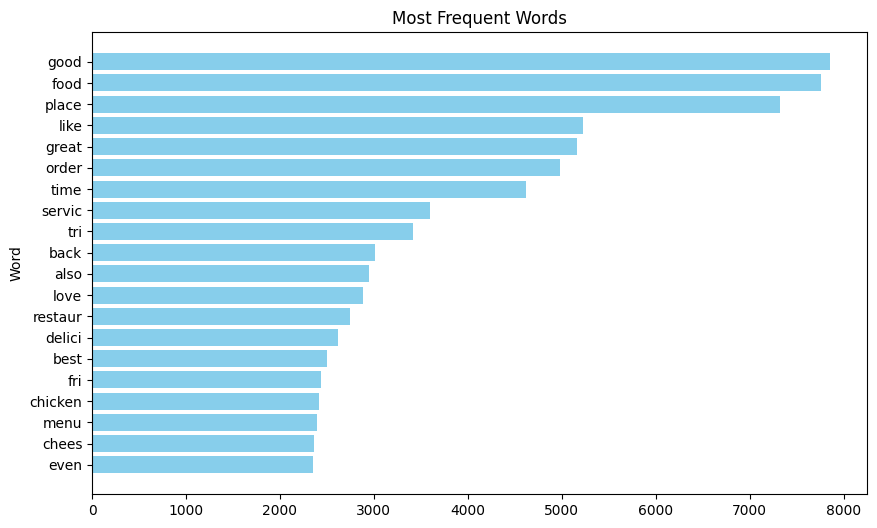

In [8]:
words = Philadelphia_reviews['final_text'].str.split(expand=True).stack()
word_counts = words.value_counts().reset_index()
word_counts.columns = ['word', 'count']
word_counts = word_counts.sort_values(by='count', ascending=False)

numberWords = 20
top_words = word_counts.head(numberWords)

plt.figure(figsize=(10, 6))
plt.barh(top_words['word'], top_words['count'], color='skyblue')
plt.ylabel('Word')
plt.title('Most Frequent Words')
plt.gca().invert_yaxis()

plt.show()

Text(0.5, 1.0, 'Word Cloud')

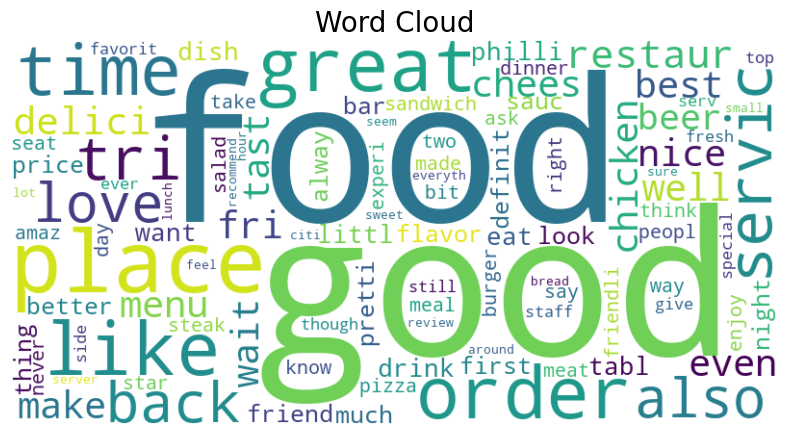

In [9]:
numberWords = 10

# Step 1: Limit the DataFrame to the top N words for the word cloud
wordCounts_pd = word_counts.head(numberWords * 10)

# Step 2: Generate the word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordCounts_pd.set_index('word')['count'].to_dict())

# Step 3: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud', fontsize=20)

## Feature Engineering

### Bag-of-Words

In [10]:
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(Philadelphia_reviews['final_text'])
X_bow

<10407x16836 sparse matrix of type '<class 'numpy.int64'>'
	with 525898 stored elements in Compressed Sparse Row format>

### TF-IDF

In [11]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(Philadelphia_reviews['final_text'])
X_tfidf


<10407x16836 sparse matrix of type '<class 'numpy.float64'>'
	with 525898 stored elements in Compressed Sparse Row format>

### N-grams

In [12]:
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
X_bigrams = bigram_vectorizer.fit_transform(Philadelphia_reviews['final_text'])

trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))
X_trigrams = trigram_vectorizer.fit_transform(Philadelphia_reviews['final_text'])

## VADER Sentiment

In [13]:

analyzer = SentimentIntensityAnalyzer()

# Apply VADER to your dataset
Philadelphia_reviews['vader_scores'] = Philadelphia_reviews['cleaned_text_stopwords_removed'].apply(lambda x: analyzer.polarity_scores(x))

# Extract compound score from the VADER sentiment output
Philadelphia_reviews['vader_compound'] = Philadelphia_reviews['vader_scores'].apply(lambda score_dict: score_dict['compound'])

# Create predicted sentiment labels based on VADER scores
# Threshold can be adjusted based on your needs
Philadelphia_reviews['vader_predicted_sentiment'] = Philadelphia_reviews['vader_compound'].apply(lambda x: 1 if x >= 0.05 else (0 if x <= -0.05 else 2))  # 1 = Positive, 0 = Negative, 2 = Neutral


In [15]:
Philadelphia_reviews[['final_text', 'vader_predicted_sentiment']].head()

final_text  \
0  regular pretti much everi saturday pick two en...   
1  friend pakistani hole wall liter feel like eat...   
2  loveee indian food ventur mani indian restaur ...   
3  place time sampl even half menu yet say surpri...   
4  like review initi bit put decor market serv al...   

   vader_predicted_sentiment  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1

In [17]:
user_restaurant_sentiment = Philadelphia_reviews.groupby(['user_id', 'restaurant_name'])['vader_predicted_sentiment'].mean().reset_index()

user_item_matrix = user_restaurant_sentiment.pivot_table(index='user_id', columns='restaurant_name', values='vader_predicted_sentiment', fill_value=0)

user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

In [18]:
def recommend_restaurants(user_id, num_recommendations=5):
    if user_id not in user_similarity_df.index:
        return []
    
    # Find similar users
    similar_users = user_similarity_df[user_id].nlargest(num_recommendations + 1).index.tolist()[1:]  # Exclude self
    
    # Get restaurants reviewed by similar users
    similar_users_reviews = user_item_matrix.loc[similar_users].mean(axis=0)
    
    # Sort restaurants by average sentiment score and get top recommendations
    recommended_restaurants = similar_users_reviews.nlargest(num_recommendations).index.tolist()
    
    return recommended_restaurants

user_id='zvq6qxc2IVA08jaUelUMRw'
recommended_restaurants = recommend_restaurants(user_id, num_recommendations=5)  
print(f"Recommended Restaurants for {user_id}:", recommended_restaurants)

Recommended Restaurants for zvq6qxc2IVA08jaUelUMRw: ['Osteria', 'Han Dynasty', "Kim's Restaurant", 'Rittenhouse Grill', '17 Snyder Chinese']


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming ground truth sentiment is in a column called 'sentiment'
y_true = Philadelphia_reviews['sentiment']
y_pred = Philadelphia_reviews['vader_predicted_sentiment']

# Step 3.1: Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # Weighted average for multiclass
recall = recall_score(y_true, y_pred, average='weighted')        # Weighted average for multiclass
f1 = f1_score(y_true, y_pred, average='weighted')                # Weighted average for multiclass

# Step 3.2: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.863
Precision: 0.858
Recall: 0.863
F1-Score: 0.842
Confusion Matrix:
[[ 441 1147   39]
 [ 163 8541   76]
 [   0    0    0]]


/Users/mac/Downloads/ADC-MECD/myenv_py311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Topic Modelling - Latent Dirichlet Allocation (LDA) with Bag of Words

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Step 1: Create a bag-of-words model
bow_vectorizer = CountVectorizer(ngram_range=(1, 2))  # Use unigrams and bigrams
dtm = bow_vectorizer.fit_transform(Philadelphia_reviews['final_text'])

# Step 2: Train the LDA model
n_topics = 5  # Number of topics you want to identify
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(dtm)

# Step 3: Extract top words for each topic
def get_topic_words(lda_model, feature_names, n_top_words):
    topic_words = []
    for topic_idx, topic in enumerate(lda_model.components_):
        words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_words.append((topic_idx, words))
    return topic_words

# Get top words for each topic
n_top_words = 10
feature_names = bow_vectorizer.get_feature_names_out()
topics = get_topic_words(lda, feature_names, n_top_words)
for topic in topics:
    print(f"Topic {topic[0]}: {', '.join(topic[1])}")


Topic 0: place, food, good, like, great, servic, love, chicken, tri, restaur
Topic 1: food, good, place, great, order, time, like, servic, tri, love
Topic 2: food, place, good, like, great, servic, order, time, tri, wait
Topic 3: place, good, order, time, food, great, like, back, love, also
Topic 4: good, food, like, place, order, time, great, tri, servic, also


In [21]:
topic_distribution = lda.transform(dtm)
user_topic_df = pd.DataFrame(topic_distribution, columns=[f'Topic {i}' for i in range(n_topics)])
user_topic_df['user_id'] = Philadelphia_reviews['user_id']  # Add user_id for merging

user_preferences = user_topic_df.groupby('user_id').mean().reset_index()

user_similarity = cosine_similarity(user_preferences.drop('user_id', axis=1))
user_similarity_df = pd.DataFrame(user_similarity, index=user_preferences['user_id'], columns=user_preferences['user_id'])

In [22]:
def recommend_users(user_id, num_recommendations=5):
    if user_id not in user_similarity_df.index:
        return []
    similar_users = user_similarity_df[user_id].nlargest(num_recommendations + 1).index.tolist()[1:]  # Exclude the user themselves
    return similar_users

In [23]:
# recommend restaurants based on these similar users
def recommend_restaurants(user_id, num_recommendations=5):
    similar_users = recommend_users(user_id, num_recommendations)
    if not similar_users:
        return []
    
    # Get restaurants reviewed by similar users
    similar_users_reviews = Philadelphia_reviews[Philadelphia_reviews['user_id'].isin(similar_users)]
    recommended_restaurants = similar_users_reviews['restaurant_name'].value_counts().head(num_recommendations)
    
    return recommended_restaurants.index.tolist()

# Get restaurant recommendations for a specific user
user_id='zvq6qxc2IVA08jaUelUMRw'
recommended_restaurants = recommend_restaurants(user_id)  
print(f"Recommended Restaurants for {user_id}:", recommended_restaurants)

Recommended Restaurants for zvq6qxc2IVA08jaUelUMRw: ['Good Dog Bar', 'Zahav', 'Federal Donuts', 'HipCityVeg', 'Tria Cafe Wash West']


## Word Embeddings - Word2Vec with Gensim

In [24]:
from gensim.models import Word2Vec

In [25]:
Philadelphia_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'restaurant_name', 'address', 'city', 'state',
       'attributes', 'categories', 'latitude', 'longitude', 'is_open', 'year',
       'sentiment', 'text_length_before_clean', 'cleaned_text',
       'cleaned_text_stopwords_removed', 'final_text', 'vader_scores',
       'vader_compound', 'vader_predicted_sentiment'],
      dtype='object')

In [26]:
Philadelphia_reviews['tokens'] = Philadelphia_reviews['final_text'].apply(lambda x: word_tokenize(x.lower()))
Philadelphia_reviews['tokens']


0        [regular, pretti, much, everi, saturday, pick,...
1        [friend, pakistani, hole, wall, liter, feel, l...
2        [loveee, indian, food, ventur, mani, indian, r...
3        [place, time, sampl, even, half, menu, yet, sa...
4        [like, review, initi, bit, put, decor, market,...
                               ...                        
10402    [place, proud, know, littl, random, shop, does...
10403    [pizza, arriv, hot, huge, move, day, yelp, piz...
10404    [plu, websit, menu, either, onlin, avail, orde...
10405    [pizza, good, recent, discov, place, despit, l...
10406    [found, new, favorit, pizza, place, philli, al...
Name: tokens, Length: 10407, dtype: object

In [27]:
# Training Word2Vec model
word2vec_model = Word2Vec(sentences=Philadelphia_reviews['tokens'], vector_size=100, window=5, min_count=1, workers=4, sg=0)  # sg=0 for CBOW, sg=1 for Skip-gram

In [28]:
# Get the vector for a specific word
word_vector = word2vec_model.wv['food']
print("Vector for 'food':", word_vector)

# Find similar words
similar_words = word2vec_model.wv.most_similar('food', topn=5)
print("Words similar to 'food':", similar_words)


Vector for 'food': [ 0.47650036 -0.43345675  0.25247884  0.6934067   0.06017322 -0.7840785
 -0.7924331   1.2150747  -1.1185632  -1.0391816  -0.03670367 -0.857311
 -0.02784286 -0.05290651 -0.1895743   0.19652268  0.5974919  -0.66948974
 -0.56608534 -1.8904154  -0.01871922  0.48930535  0.82086927 -0.75925714
 -0.06800896  0.24917343 -0.1474669   0.8615705  -1.3902463   0.6337701
  0.7490631   0.91747844  0.10865287 -2.6954257  -0.4884592   0.06306338
 -0.40358981 -1.0646281   0.03522111 -0.5079344   0.28059047 -0.62244743
 -0.6238283  -0.13942204  1.3941101   1.153181   -0.0318425   0.16920325
 -0.6095548  -0.19366553  0.5263441  -1.2256963   0.17601173 -0.18385312
  0.314694    0.00964488 -0.530491    1.0762155  -0.95263493 -0.0386564
 -0.74180216 -0.40334138  0.07858937 -0.18915778 -0.5960572   1.7432538
  0.3879439   0.70013064  0.23046778  0.40950415 -0.40973026 -0.23913491
  0.85181683  0.37320983  0.71166164  0.20203038 -1.1575042  -0.83011657
  0.65456885 -0.9130731  -0.16926792  

In [29]:
# Save the model
word2vec_model.save("word2vec_model.model")

# Load the model
loaded_model = Word2Vec.load("word2vec_model.model")


## Representation with Word Embeddings

In [30]:

def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.key_to_index]
    return np.mean(word2vec_model.wv[doc], axis=0)

# Apply the function to create document vectors
Philadelphia_reviews['doc_vector'] = Philadelphia_reviews['tokens'].apply(document_vector)

# Convert to a 2D numpy array
X = np.array(Philadelphia_reviews['doc_vector'].tolist())
X


array([[-0.12119471,  0.4963387 ,  0.15958932, ..., -0.55753666,
         0.05514355, -0.39201242],
       [-0.19182907,  0.4952246 ,  0.1949261 , ..., -0.54272264,
         0.0143623 , -0.20884573],
       [-0.10397015,  0.40312842,  0.16982217, ..., -0.45726538,
         0.02162167, -0.21378502],
       ...,
       [-0.10174176,  0.4372398 ,  0.17224057, ..., -0.53916883,
         0.16224256, -0.27303937],
       [-0.31584638,  0.37684315,  0.25610656, ..., -0.43121615,
         0.0729869 , -0.21885216],
       [-0.18508106,  0.3377202 ,  0.28505695, ..., -0.3074179 ,
         0.35511845, -0.27413833]], dtype=float32)

### Word Embedding - User Based Preferences

In [32]:
from sklearn.cluster import KMeans

n_topics = 5  # Specify the number of topics
kmeans = KMeans(n_clusters=n_topics, random_state=42)
Philadelphia_reviews['embedding_topic'] = kmeans.fit_predict(X)


In [33]:
user_preferences = Philadelphia_reviews.groupby(['user_id', 'embedding_topic']).size().unstack(fill_value=0)

In [34]:
def recommend_restaurants(user_id):
    # Get the user's preferred topics
    user_topics = user_preferences.loc[user_id]
    preferred_topics = user_topics[user_topics > 0].index.tolist()
    
    # Find restaurants associated with preferred topics
    recommended_restaurants = Philadelphia_reviews[Philadelphia_reviews['embedding_topic'].isin(preferred_topics)]

    top_restaurants = recommended_restaurants.groupby('restaurant_name').agg({'stars': 'mean'}).reset_index()
    top_restaurants = top_restaurants.sort_values(by='stars', ascending=False).head(10)
    
    return top_restaurants['restaurant_name'].unique()

In [35]:
# Example recommendation
print(recommend_restaurants(user_id='zvq6qxc2IVA08jaUelUMRw'))

["John's Roast Pork" 'PrimoHoagies' "King's Garden" "Stella's Pizza"
 'Point Breakfast Restaurant' "Passero's Coffee Roasters" "Scannicchio's"
 'The Foodery' "Bui's" 'North Bowl']


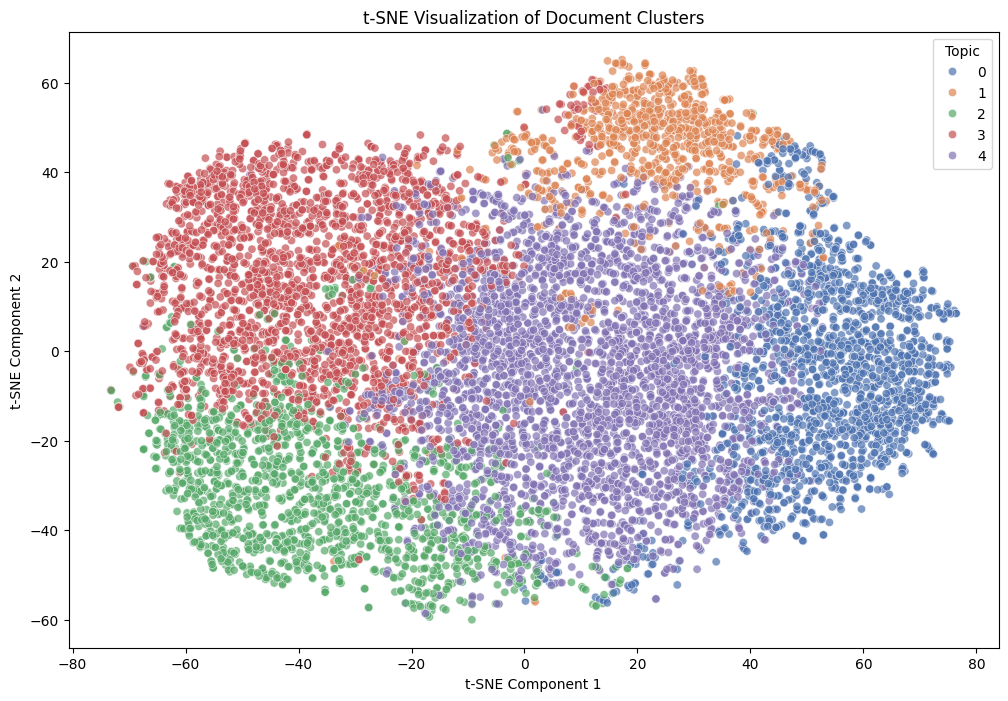

In [36]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Create a t-SNE model and fit it to the document vectors
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Add t-SNE results to the DataFrame
Philadelphia_reviews['tsne_x'] = X_tsne[:, 0]
Philadelphia_reviews['tsne_y'] = X_tsne[:, 1]

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=Philadelphia_reviews, x='tsne_x', y='tsne_y', hue='embedding_topic', palette='deep', legend='full', alpha=0.7)
plt.title('t-SNE Visualization of Document Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Topic')
plt.show()
